In [1]:
%matplotlib inline
import random
import time

import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

## Variable aleatoria

Una variable aleatoria es una función que depende de un suceso aleatorio.

$$
X:\Omega\rightarrow \mathbb{R}
$$

donde hay una medida de probabilidad $P$ sobre el *espacio muestral* $\Omega$.

### Función de densidad de una variable aleatoria continua

Para una variable aleatoria discreta $X$, definimos la **función de densidad** $f_X$ si se verifica:

$$
P(X\in[a,b]) = \int_{a}^b \;f_X(x)\:dx
$$

Si la función de densidad corresponde a una distribución conocida, diremos:

  - "la variable aleatoria X sigue una distribución normal con media 100 y desviación típica 10."

ó 

  - "la variable aleatoria X se distribuye según una exponencial con tasa 5"

por ejemplo.

## Esperanza de una variable aleatoria continua

Intuitivamente, la **esperanza** o **valor esperado** de una distribución de probabilidad es el **promedio** de los valores obtenidos al hacer muchas extracciones.

Si hacemos una extracción $\{x_i\}_{i=1}^N$ de tamaño N:
$$
\frac{1}{N}\Sigma_{i=1}^N \:x_i
$$
Si $N$ es lo bastante grande, y dividimos el soporte en intervalos de longitud $h$, como hacíamos al definir las *sumas de Riemann*, descomponemos un intervalo $I=[a,b]$ en $n$ subintervalos $[\tilde{x}_k,\tilde{x}_{k+1}]$.

Cada intervalo $[\tilde{x}_k,\tilde{x}_{k+1}]$ aparece una proporción 
$$P(X\in [\tilde{x}_k,\tilde{x}_{k+1}]) =
\int_{\tilde{x}_k}^{\tilde{x}_{k+1}} f(x)\:dx\approx
f(\tilde{x}_k) h.
$$

Por tanto:
$$
\begin{split}
\frac{1}{N}\Sigma_{i=1}^N \:x_i &\approx 
\Sigma_{k}\: \tilde{x}_k\frac{\text{# }\{x_i\in[\tilde{x}_k,\tilde{x}_{k+1}]\}}{N}\\
&\approx\Sigma_{k}\: x_k\:P(X\in [\tilde{x}_k,\tilde{x}_{k+1}])\\
&\approx\frac{1}{h}\Sigma_{k}\: \tilde{x}_k\:f(\tilde{x}_k)\\
&\approx\int x\:f(x)
\end{split}
$$
Es decir, en la suma original $\frac{1}{N}\Sigma_{i=1}^N \:x_i$, hemos sustituido todos los puntos $x_i$ que están en un intervalo $[\tilde{x}_k,\tilde{x}_{k+1}]$ por $\tilde{x}_k$, y así hemos podido aproximar la suma de los $x_i$ por una suma de Riemann.

De forma precisa, para una variable aleatoria continua son soporte $S$, **la esperanza se define como**:
$$
E(X) = \int_S x\:f(x)
$$

Por lo tanto, es muy fácil simular la esperanza de una VA cuya distribución no conocemos:

In [2]:
def experimento_pi():
    'Medimos el tiempo que tarda el ordenador en hacer cierto cálculo'
    tstart = time.time()
    x = sum(
        (-1)**k/(2*k+1)
        for k in range(1000)
    )
    tend = time.time()
    return tend-tstart

In [3]:
def promedio_experimento(va, N=1000):
    return sum(va() for j in range(N) )/N

In [4]:
experimento_pi()

0.0012502670288085938

In [5]:
promedio_experimento(experimento_pi)

0.00030670857429504397

### Transformación de una variable aleatoria continua: g(X)
No vamos a detenernos a definir de forma precisa el **soporte** de una VA continua, pero podemos decir que es *el conjunto con probabilidad 1 más "pequeño" posible*.

Si
$$
X:\Omega\rightarrow \mathbb{R}
$$
es una VA continua con soporte $S$ y $g:S\rightarrow\mathbb{R}$ es una función definida en $S$, podemos definir
$$
g\circ X = g(X):\Omega\rightarrow \mathbb{R}
$$
como la composición $(g\circ X)(w) = g(X(w))$

 - ¿Cuál es el *soporte* de esta variable aleatoria?

Es la imagen $g(S)$ por $g$ del conjunto $S$. 

*Soporte de g(X)* = $\{f(x),\; x\in S\}$.

#### Preguntas

- U es una VA que se distribuye según una Uniforme(1,2) (es decir, toma cualquier valor real entre 1 y 2 con la misma probabilidad).

¿Cuál es el soporte de $U^2$?

- N es una VA que se distribuye según una Normal(0,1).

¿Cuál es el soporte de $N^2$?

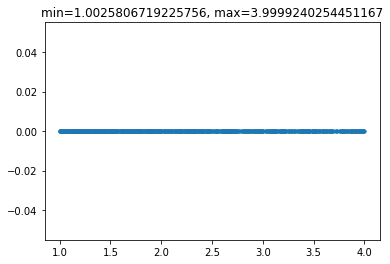

In [6]:
#Ante la duda, podemos simular
def experimento_U2():
    t = 1 + random.random()
    return t**2

muestra = [experimento_U2() for j in range(1000)]
plt.plot(muestra, #la coordenada x es el valor obtenido
         [0]*len(muestra), #la coordenada y es 0
         '.')
plt.title('min=%s, max=%s'%(min(muestra), max(muestra)))
plt.show()

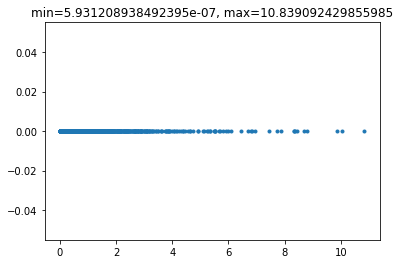

In [7]:
#Ante la duda, podemos simular, pero es posible que 
#el resultado no sea concluyente, porque no veremos las
#regiones de probabilidad muy baja
#Sin embargo, normalmente sera de ayuda
N = st.norm(loc=0, scale=1)
def experimento_N2():
    t = N.rvs(1)[0]
    return t**2

muestra = [experimento_N2() for j in range(1000)]
plt.plot(muestra, #la coordenada x es el valor obtenido
         [0]*len(muestra), #la coordenada y es 0
         '.')
plt.title('min=%s, max=%s'%(min(muestra), max(muestra)))
plt.show()

## Función de densidad de g(X)

Si transformamos una VA continua $X$ mediante una transformación g continua, el resultado será una VA continua.
$$
P(g(X)\in A) = \int_{A} f_{g(X)}(y) dy
$$
pero 
$$
g(X)\in A \Leftrightarrow X\in g^{-1}(A)
$$
$$
P(X\in g^{-1}(A)) = \int_{g^{-1}(A)} f_{X}(x) dx
$$
Si $g$ es inyectiva, hacemos el cambio de variable $y=g(x)$:
$$
\int_{g^{-1}(A)} f_{X}(x) dx =
\int_{A} f_{X}(g^{-1}(y)) (g^{-1})'(y) dy
$$
y deducimos, que **la función de densidad de $Y=g(X)$** es

$$
f_{g(X)}(y)=f_{X}(g^{-1}(y)) (g^{-1})'(y)
$$

*¡Esta fórmula sólo vale si g es inyectiva!*

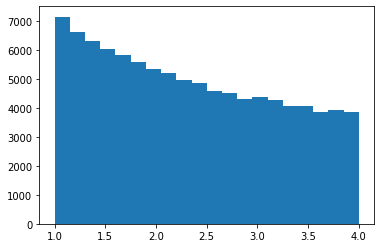

In [8]:
#Ante la duda, podemos dibujar un histograma, con las
#precauciones habituales para histogramas de VA continuas
def experimento_U():
    t = 1+random.random()
    return t

muestra = [experimento_U() for j in range(100000)]
muestra2 = [t**2 for t in muestra]

plt.hist(muestra2, bins=20)
plt.show()

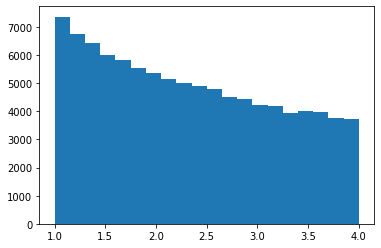

In [9]:
#Ante la duda, podemos dibujar un histograma, con las
#precauciones habituales para histogramas de VA continuas
def experimento_U2():
    t = 1+random.random()
    return t**2

muestra = [experimento_U2() for j in range(100000)]

plt.hist(muestra, bins=20)
plt.show()

Observamos que si U es una Uniforme(1,2), entonces $U^2$ no parece una Uniforme($1^2, 2^2$).

Repetimos el ejercicio para la Normal(0,1)

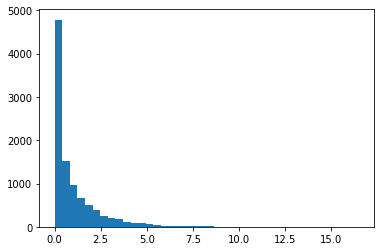

In [10]:
#Ante la duda, podemos dibujar un histograma, con las
#precauciones habituales para histogramas de VA continuas
N = st.norm(loc=0, scale=1)
def experimento_N2():
    t = N.rvs(1)[0]
    return t**2

muestra = [experimento_N2() for j in range(10000)]

plt.hist(muestra, bins=40)
plt.show()

### Cuestión

$X$ es una Normal(0,1), cuya función de densidad es:
$$
f(x) = {\displaystyle {\frac {1}{\sqrt {2\pi}}}e^{-{\frac {x^2 }{2}}}}.
$$

Encuentra de forma analítica la función de densidad de la VA $Y=a+bX$.

### Esperanza de g(X)

 - ¿Cuál es la *esperanza* de la variable aleatoria $g(X)$?

Según la definición:
$$
E[g(X)] = \int_{g(S)} y\:f_{g(X)}(y) dy
$$
Si la transformación $g$ es invertible, podemos sustituir el valor de $f_{g(X)}$ obtenido antes y hacer un cambio de variable $y=g(x)$:
$$
E[g(X)] = \int_{g(S)} y\:f_{X}(g^{-1}(y)) (g^{-1})'(y) dy
 = \int_{S} g(x)\:f_{X}(x) dx
$$
De hecho, aunque sólo lo hemos demostrado para $g$ inyectiva, es cierto siempre:
$$
E[g(X)] = \int_{S} g(x)\:f_{X}(x) dx
$$
esta fórmula es muy interesante porque sólo aparece la función de densidad de X, y no necesitamos calcular la función de densidad $f_{g(X)}$ de g(X):

 - $E[X] =  \int_{S} a\:f(a)\:da$
 - $E[X^2] = \int_{S} a^2\:f(a)\:da$
 - $E[\log(X)] = \int_{S} \log(a)\:f(a)\:da$

### Ejercicio

U es una VA que se distribuye según una Uniforme(1,3) (es decir, su función de densidad es constante $\frac{1}{2}$ en el intervalo $[1,3]$, y su densidad es 0 fuera de ese intervalo).

Razona de forma exacta cuál es el soporte de estas distribuciones y aproxima mediante simulaciones:

 - $E[U^2]$
 - $E[2^U]$

## Varianza y desviación típica de una distribución continua

 - La **varianza** es el promedio de la distancia a la media, elevada al cuadrado.
    - $X$ es una VA con función de densidad f.
    - $\mu = E[X] = \int_{a}\: a\:f(a)\:da$ es la esperanza de $X$ (es un número real).
    - $X - \mu$ es una VA (a una variable aleatoria le restamos un número).
    - $(X - \mu)^2$ es una VA, resultado de transformar $X$ mediante la función $g(t) = (t - \mu)^2$
    - Definimos la **varianza** de $X$ como la esperanza de $(X - \mu)^2$:
$$
Var[X] = E[(X - \mu)^2] = \int_{S}\: (a - \mu)^2\:f(a)\:da
$$
También se puede calcular como
$$
Var[X] = E[X^2] - E[X]^2 = E[X^2] - \mu^2
$$

Recuerda que la varianza tiene las unidades de $X$ al cuadrado.
 
 - La **desviación típica** es la raíz cuadrada de la varianza:

$$
\sigma[X] = \sqrt{Var[X]}= \sqrt{E[(X - E[X])^2]} = \sqrt{\int_{S}\: (a - E[X])^2\:f(a)\:da}
$$


De todas formas, podemos pedir a scipy.stats que calcule la media, la varianza y la desviación típica.

In [11]:
E = st.expon(scale=1/100)
E.mean(), E.var(), E.std()

(0.01, 0.0001, 0.01)